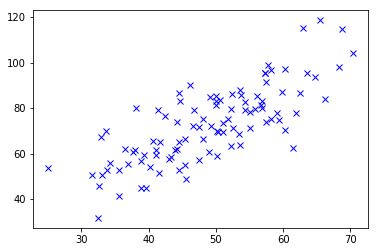

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("../l1_data.csv", delimiter=",")
plt.plot(data[:, 0], data[:, 1], 'bx')
plt.show()

In [53]:
def split(data):
    examples_count, columns_count = data.shape
    return data[:, 0:columns_count - 1], data[:, columns_count - 1]

def add_bias(data):
    examples_count, columns_count = data.shape
    bias = np.ones((examples_count, columns_count + 1))
    bias[:, 1:] = data
    return bias

def hypothesis(thetas, features):
    return np.dot(thetas, features.T)

def train(data, learning_rate=0.001, iterations=20):
    features, y = split(data)
    bias_features = add_bias(features)
    examples_count, features_count = bias_features.shape
    costs = np.zeros((1, iterations))
    thetas = np.zeros((1, features_count))
    for i in range(iterations):
        costs[0, iterations - i - 1] = (1 / (2 * examples_count)) * np.sum((hypothesis(thetas, bias_features) - y) ** 2, axis=1)
        thetas = thetas - (learning_rate / examples_count) * np.dot(hypothesis(thetas, bias_features) - y, bias_features)
    return thetas, costs

In [54]:
thetas, costs = train(data)

In [55]:
def plot(costs):
    plt.plot(costs)
    plt.show()

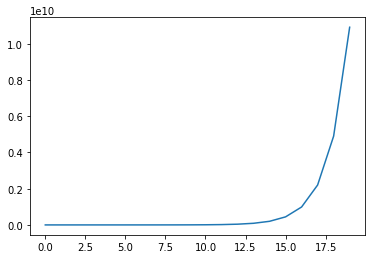

[[  -86.72941846 -4412.96223248]]


In [56]:
plot(costs.T)
print(thetas)